# Day 02 — Housing Price Insight Predictor
### Multi-Feature Linear Regression with Real Dataset

This notebook covers:
- Loading the California Housing dataset
- Correlation & feature impact exploration
- Multi-feature regression modeling
- Error evaluation using MSE, MAE, RMSE, R²
- Predicting housing price values
---


## Imports & Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

import joblib, os

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

print("Libraries loaded successfully.")

Libraries loaded successfully.


## Load Dataset

In [3]:
data = fetch_california_housing(as_frame=True)
df = data.frame.copy()

print("Shape:", df.shape)
df.head()

Shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Correlation Heatmap

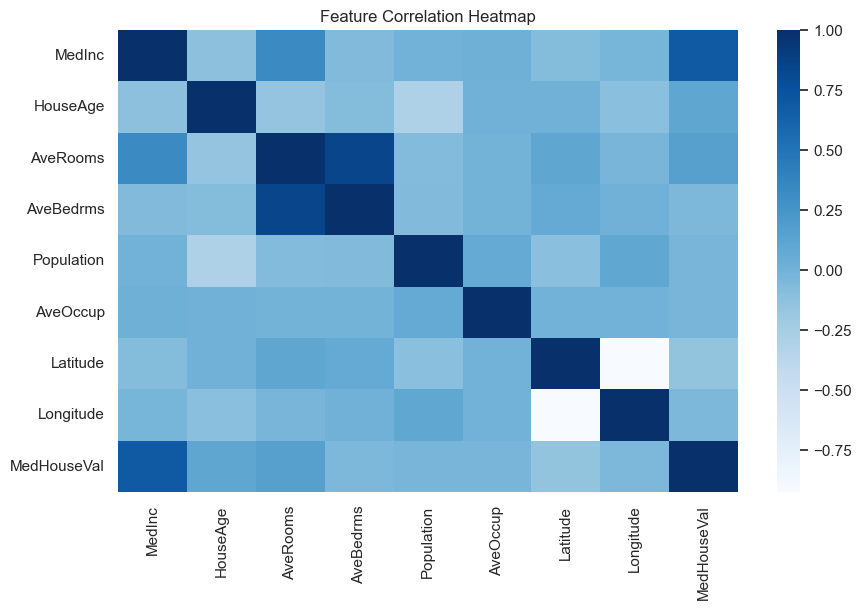

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=False, cmap="Blues")
plt.title("Feature Correlation Heatmap")
plt.show()

## Split Features & Target

In [7]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((16512, 8), (4128, 8))

## Scaling Features and Training Model

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Scaling complete.")

model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Model trained.")
print("Coefficients:", model.coef_)
print("Intercept   :", model.intercept_)

Scaling complete.
Model trained.
Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Intercept   : 2.071946937378881


In [19]:
# Predictions
y_pred = model.predict(X_test_scaled)

pd.DataFrame({
    "Actual": y_test[:5].values,
    "Predicted": y_pred[:5]})

,Actual,Predicted
0,0.47700,0.719123
1,0.45800,1.764017
2,5.00001,2.709659
3,2.18600,2.838926
4,2.78000,2.604657


## Evaluation Metrics

In [20]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Evaluation Results")
print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

Evaluation Results
MSE : 0.5559
RMSE: 0.7456
MAE : 0.5332
R²  : 0.5758


## Actual vs Predicted Plot

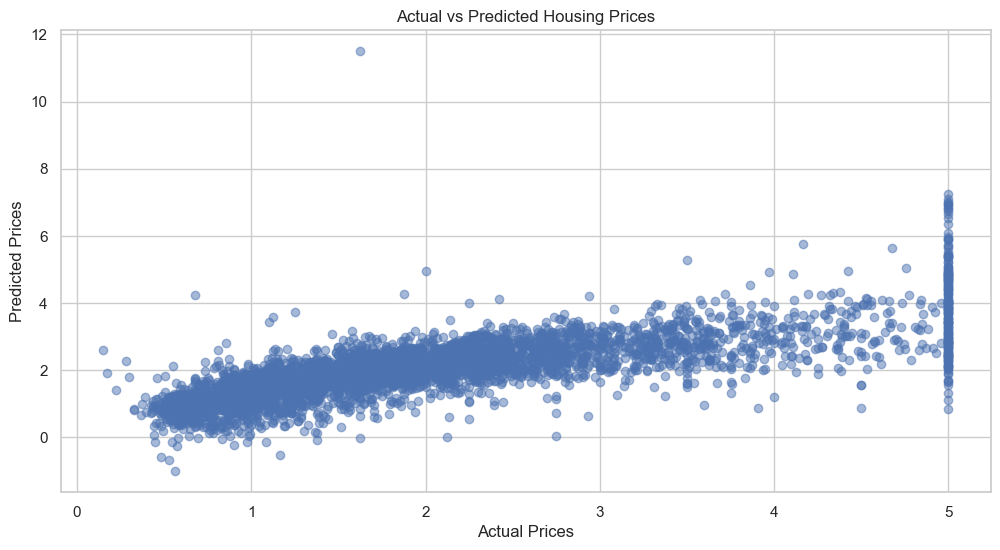

In [21]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.show()

## Feature Contribution plot

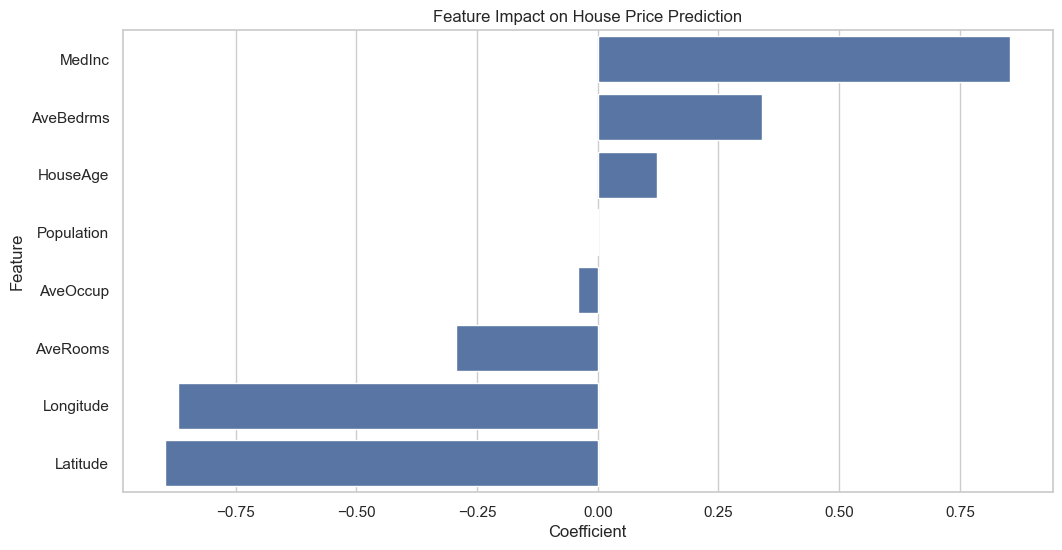

,Feature,Coefficient
0,MedInc,0.854383
3,AveBedrms,0.339259
1,HouseAge,0.122546
4,Population,-0.002308
5,AveOccup,-0.040829
2,AveRooms,-0.294410
7,Longitude,-0.869842
6,Latitude,-0.896929


In [22]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

sns.barplot(x="Coefficient", y="Feature", data=coeff_df)
plt.title("Feature Impact on House Price Prediction")
plt.show()

coeff_df

## Imports & Setup

In [27]:
os.makedirs("../models", exist_ok=True)
joblib.dump(model, "../models/housing_regressor.pkl")
print("Model saved to ../models/housing_regressor.pkl")

Model saved to ../models/housing_regressor.pkl


## Summary of Results

- Dataset: California Housing (real-world)
- Model: Multi-Feature Linear Regression
- Key performance metrics: MSE, RMSE, MAE, R²
- Features were standardized to improve learning
- Bar plot shows most impactful features

This project demonstrates moving from a **single-input model (Day 1)** to a **multi-input real dataset**.

---
